### HW_2

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с горизонт прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" . Учитывать только глубину истории при p=3

Оцените ошибку модели из п.1 .

Сделайте вывод о том, как изменилась ошибка модели по значениям h.

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

Какие из рядов на картинке стационарны на первый взгляд? (презентация, слайд номер 21)

#### Ответ

1) Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с горизонт прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" . Учитывать только глубину истории при p=3

Оцените ошибку модели из п.1 .

Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

In [3]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data.index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01',
               ...
               '2018-08-02', '2018-08-02', '2018-08-02', '2018-08-02',
               '2018-08-02', '2018-08-02', '2018-08-02', '2018-08-02',
               '2018-08-02', '2018-08-03'],
              dtype='datetime64[ns]', name='Date', length=145374, freq=None)

In [5]:
def exponential_smoothing(series, alpha):
    n = series.shape[0]//10
    result = [np.mean(series[0:n])] # начинать лучше со среднего значения
    
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [6]:
# Ресемплирование и экспоненциальное сглаживание

d_data = data.resample('D').mean()
data_exp_1 = exponential_smoothing(d_data['PJME_MW'], 0.1)

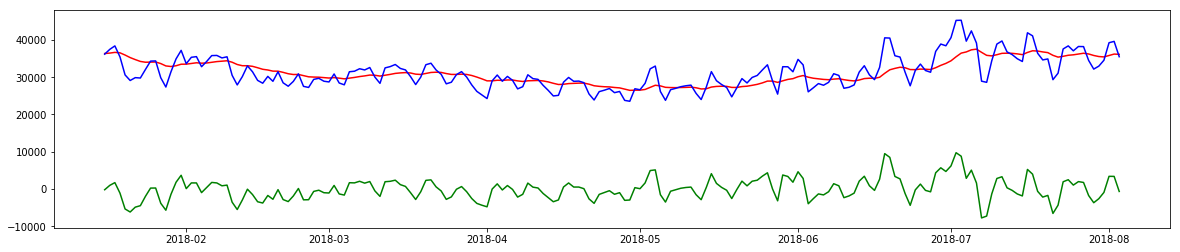

In [7]:
# Просмотр части того, что получилось:

plt.figure(figsize=(20, 4))
plt.plot(d_data[-200:].index, data_exp_1[-200:], 'r')
plt.plot(d_data[-200:].index, d_data[-200:]['PJME_MW'], 'b')
plt.plot(d_data[-200:].index, d_data[-200:]['PJME_MW']-data_exp_1[-200:], 'g')

In [8]:
df_data_exp_1 = pd.DataFrame(data = data_exp_1, index = d_data.index)
data_trend_free = (d_data['PJME_MW'] - df_data_exp_1.iloc[:,0])

# Проверка ряда на стационарность:

ADF_data_trend_free = sm.tsa.stattools.adfuller(data_trend_free, regression = 'ctt')
print(f'p-value = {ADF_data_trend_free[1]}')

p-value = 1.734346682955174e-13


Т.к. p-value практически равно 0 => первоначальный ряд за вычетом данных из ряда с экспоненциальным сглаживанием является стационарным.

In [9]:
df = df_data_exp_1

# Учитывать только глубину истории при p=3
df['t2'] = 0
df.iloc[3:, 1] = df.iloc[:-3, 0].values
df.fillna(0)

# экспоненциальное сглаживание 
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_05'] = exponential_smoothing(df[0], 0.05)
df['exp_0_1'] = exponential_smoothing(df[0], 0.1)

# 1-й порядок разностей
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[1:, 0].values - df.iloc[:-1, 0].values

df.head(4)

,0,t2,exp_0_01,exp_0_05,exp_0_1,diff1
Date,,,,,,
2002-01-01,31925.426497,0.000000,31847.310564,31847.310564,31847.310564,0.000000
2002-01-02,32159.038014,0.000000,31850.427838,31862.896936,31878.483309,233.611517
2002-01-03,32394.321713,0.000000,31855.866777,31889.468175,31930.067149,235.283699
2002-01-04,32526.435375,31925.426497,31862.572463,31921.316535,31989.703972,132.113662


In [10]:
# Train|test split

def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train, test = split_data(df, '2018-05-01')

In [11]:
# Ошибка:

def mean_absolute_percentage_error(y_true, y_pred, h): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return print(f'Средняя ошибка = {np.mean(np.abs((y_true - y_pred) / y_true)) * 100 :.2f}% при горизонте прогноза h = {h}')

In [12]:
h = 1

X_train = train.iloc[:-h, :]
y_train = train[0].values[h:]
X_test = test.iloc[:-h, :]
y_test = test[0].values[h:]

# Предсказание
model = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model.fit(X_train, y_train) 

y_test_pred = model.predict(X_test)

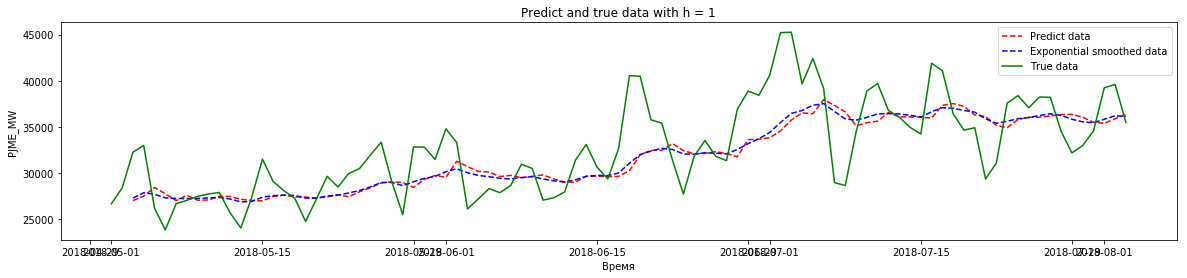

In [13]:
plt.figure( figsize=(20, 4))

plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(test.index[h:], y_test_pred, '--r', label='Predict data')
plt.plot(test.index[h:], y_test, '--b', label='Exponential smoothed data')
plt.plot(d_data.loc['2018-05-01':].index, d_data.loc['2018-05-01':]['PJME_MW'], 'g', label='True data')
plt.title(f'Predict and true data with h = {h}')

plt.legend()
plt.show()

In [14]:
# Сравним "на глаз":

y_test[-2:], y_test_pred[-2:]

(array([36188.11134603, 36117.90021143]),
 array([35853.13237484, 36342.56766013]))

In [15]:
mean_absolute_percentage_error(y_test, y_test_pred, h)

Средняя ошибка = 0.98% при горизонте прогноза h = 1


In [16]:
h = 10

X_train = train.iloc[:-h, :]
y_train = train[0].values[h:]
X_test = test.iloc[:-h, :]
y_test = test[0].values[h:]

# Предсказание
model = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model.fit(X_train, y_train) 

y_test_pred = model.predict(X_test)

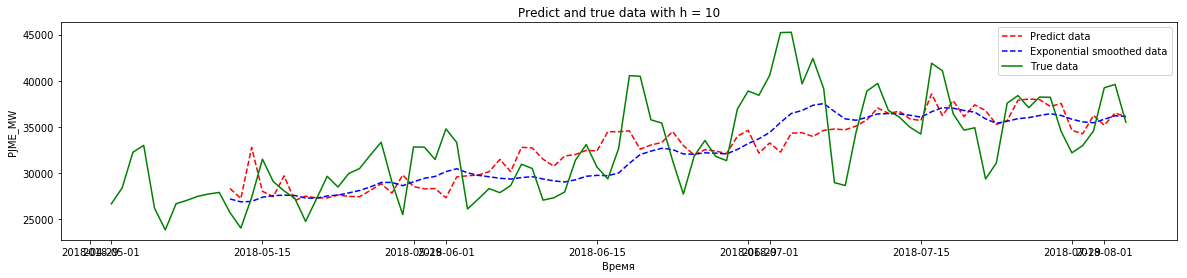

In [17]:
plt.figure( figsize=(20, 4))

plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(test.index[h:], y_test_pred, '--r', label='Predict data')
plt.plot(test.index[h:], y_test, '--b', label='Exponential smoothed data')
plt.plot(d_data.loc['2018-05-01':].index, d_data.loc['2018-05-01':]['PJME_MW'], 'g', label='True data')
plt.title(f'Predict and true data with h = {h}')

plt.legend()
plt.show()

In [18]:
mean_absolute_percentage_error(y_test, y_test_pred, h)

Средняя ошибка = 4.08% при горизонте прогноза h = 10


##### ВЫВОД: 
    При росте горизонта прогноза ошибка ожидаемо выросла от 0.98% при h = 1 до 4.08% при h = 10.

---------------------------------------------------------------------------------------------------------------

2) Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном - с сезоном (лето/зима), с циклом (например, в зависимости от ветров), с трендом (потепление или похолодание климата).

б) Количество денег, которые тратят покупатели в интернет магазине - с сезоном (зима/лето, по дням недели), с циклом (в привязке к праздникам), с трендом из-за инфляции.

в) Вес растущего котенка - с сезоном (летом растёт, наверное, быстрее), с трендом (рост замедляется).

г) Прирост объема деревьев в лесу от времени - с сезоном (летом прирост больше).

----------------------------------------------------------------------------------------------------------------------

3) Какие из рядов на картинке стационарны на первый взгляд? (презентация, слайд номер 21)

b, d, g, h